In [101]:
 
import yfinance as yf
import datetime

In [102]:
df=yf.download('AAPL', start='2020-01-01', end='2023-12-30')

[*********************100%***********************]  1 of 1 completed


In [103]:
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.876099   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.167610   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.742653   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.400536   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.565193   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  192.868134   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.320221   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.419830   
2023-12-28  194.139999  194.660004  193.169998  193.580002  192.848221   
2023-12-29  193.899994  194.399994  191.729996  192.529999  191.802185   

               Volume  
Date         

In [104]:
df.to_csv('apple.csv')

In [105]:
import pandas as pd

In [106]:
df=pd.read_csv('apple.csv')

In [107]:
df.head(300)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200
...,...,...,...,...,...,...,...
295,2021-03-05,120.980003,121.940002,117.570000,121.419998,119.039391,153766600
296,2021-03-08,120.930000,121.000000,116.209999,116.360001,114.078606,154376600
297,2021-03-09,119.029999,122.059998,118.790001,121.089996,118.715866,129525800
298,2021-03-10,121.690002,122.169998,119.449997,119.980003,117.627632,111943300


In [108]:
df1=df.reset_index()['Close']

In [109]:
df1.shape

(1006,)

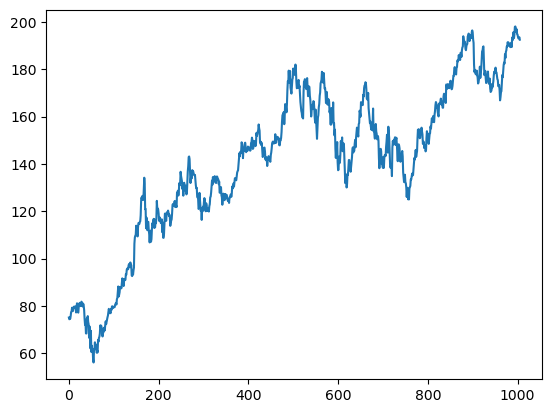

In [110]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [111]:
import numpy as np

In [112]:
df1

0        75.087502
1        74.357498
2        74.949997
3        74.597504
4        75.797501
           ...    
1001    193.600006
1002    193.050003
1003    193.149994
1004    193.580002
1005    192.529999
Name: Close, Length: 1006, dtype: float64

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [114]:
#splitting the dataset from train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [115]:
training_size,test_size

(653, 353)

In [116]:
train_data

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       [0.13030088],
       [0.13875052],
       [0.15008715],
       [0.15131936],
       [0.16299047],
       [0.15545619],
       [0.15309733],
       [0.15996267],
       [0.16610632],
       [0.16230396],
       [0.16429316],
       [0.16698649],
       [0.16536695],
       [0.14889013],
       [0.16427554],
       [0.17598183],
       [0.17515447],
       [0.14987592],
       [0.14837961],
       [0.16631755],
       [0.17089446],
       [0.17751333],
       [0.16839474],
       [0.17107045],
       [0.16765538],
       [0.18101645],
       [0.17691481],
       [0.17705567],
       [0.16658159],
       [0.17471438],
       [0.16887002],
       [0.15610751],
       [0.12993116],
       [0.11215165],
       [0.12019645],
       [0.08652102],
       [0.08623935],
       [0.13104019],
       [0.11433452],
       [0.13795834],
       [0.12067178],
       [0.11382401],
       [0.07358251],
       [0.10732832],
       [0.089

In [117]:
import numpy 
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return numpy.array(datax),numpy.array(datay)     

In [118]:
#reshape into x=t,t+1,t+2,t+3 and y=t+4

time_step=100
x_train ,y_train=create_dataset(train_data,time_step)
x_test ,y_test=create_dataset(test_data,time_step)

In [119]:
print(x_train.shape),print(y_train.shape)

(552, 100)
(552,)


(None, None)

In [120]:
print(x_test.shape),print(y_test.shape)

(252, 100)
(252,)


(None, None)

In [121]:
#reshape input to be [samples,time steps,features]which is reaquired for lstm
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [122]:
#create stacked lstm model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [123]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/Users/mayankpathak/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [124]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 0.1542 - val_loss: 0.0117
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0129 - val_loss: 0.0230
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.0074 - val_loss: 0.0119
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.0057 - val_loss: 0.0180
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 0.0046 - val_loss: 0.0091
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.0038 - val_loss: 0.0106
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.0034 - val_loss: 0.0066
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0029 - val_loss: 0.0071
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0028 - val_loss: 0.0054
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.0029 - val_loss: 0.0044
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 0.0

In [126]:
import tensorflow as tf

In [127]:
tf.__version__


'2.16.1'

In [128]:
###lets do the prediction and check performmance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [129]:
#transform back to original prediction 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict) 

In [130]:
#calculate rmse performance metrices
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

138.92848297465707

In [131]:
#test data rmse
math.sqrt(mean_squared_error(y_test,test_predict))

171.4835903932987

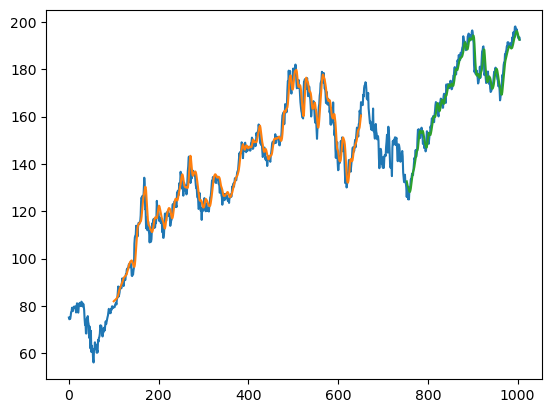

In [135]:
##plotting 
#shift train prediction for plotting
look_back=100
trainpredictplot=numpy.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test prediction for plottting
testpredictplot=numpy.empty_like(df1)
testpredictplot[:,:]=numpy.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [136]:
len(test_data)

353

In [151]:
x_input=test_data[253:].reshape(1,-1)
x_input.shape

(1, 100)

In [152]:
temp_input=list(x_input)
 

In [153]:
temp_input

[array([0.85973561, 0.8581865 , 0.85691899, 0.8686782 , 0.85452495,
        0.8483286 , 0.83023219, 0.83368251, 0.84318831, 0.85297583,
        0.88036682, 0.84699072, 0.86269298, 0.87381838, 0.90149098,
        0.92634706, 0.92789617, 0.93909206, 0.94078192, 0.89297096,
        0.8552995 , 0.85966513, 0.86797402, 0.8464274 , 0.83171093,
        0.84248424, 0.83734395, 0.8581865 , 0.86593206, 0.84072389,
        0.82973924, 0.83579483, 0.84487828, 0.81586781, 0.80509439,
        0.80692522, 0.81058677, 0.82847184, 0.81896593, 0.82783814,
        0.83663987, 0.85480666, 0.86536874, 0.86114387, 0.87107225,
        0.87747993, 0.86438295, 0.86346754, 0.85241251, 0.84318831,
        0.84051266, 0.82234587, 0.8231908 , 0.82628903, 0.80981221,
        0.78016793, 0.78953299, 0.8041086 , 0.80748854, 0.83002095,
        0.85536999, 0.84889182, 0.8670586 , 0.88529587, 0.8928301 ,
        0.88945027, 0.91754533, 0.90627917, 0.92486843, 0.92888196,
        0.9408524 , 0.94071155, 0.95310435, 0.94

In [154]:
 # demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95754486]
2
[0.95754486]
3
[0.95754486]
4
[0.95754486]
5
[0.95754486]
6
[0.95754486]
7
[0.95754486]
8
[0.95754486]
9
[0.95754486]
10
[0.95754486]
11
[0.95754486]
12
[0.95754486]
13
[0.95754486]
14
[0.95754486]
15
[0.95754486]
16
[0.95754486]
17
[0.95754486]
18
[0.95754486]
19
[0.95754486]
20
[0.95754486]
21
[0.95754486]
22
[0.95754486]
23
[0.95754486]
24
[0.95754486]
25
[0.95754486]
26
[0.95754486]
27
[0.95754486]
28
[0.95754486]
29
[0.95754486]
30
[0.95754486]
31
[[0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295], [0.9575448632240295],

In [156]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [157]:
import matplotlib.pyplot as plt

In [158]:
len(df1)

1006

In [159]:
df2=df1.tolist()
df2.extend(lst_output)

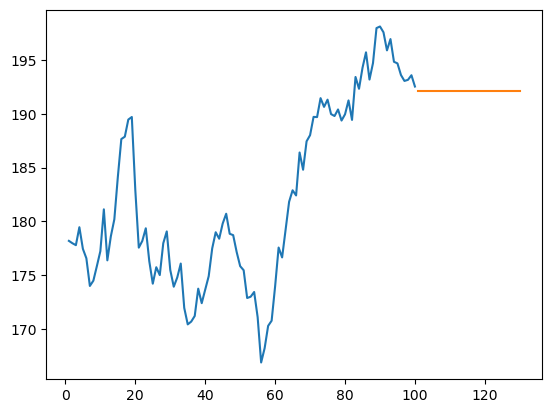

In [161]:
plt.plot(day_new,scaler.inverse_transform(df1[906:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))